In [23]:
import torch
import pandas as pd
from run_grid_experiments import run_grid_experiments

In [33]:

seeds = list(range(2))
n_inits = [2]
noise_levels = [10]
noise_bools = [True, False]
budget = 30

sm_list = {}
df = pd.DataFrame(columns=["n_init", "noise_level", "seed", "noise_bool", "best"])
for noise_bool in noise_bools:
    for n_init in n_inits:
        for noise_level in noise_levels:
            sm_agg = torch.zeros((len(seeds), n_init+budget))
            for idx, seed in enumerate(seeds):
                X, Y, Y_real, model = torch.load(f"results/Schwe_n_init_{n_init}_noiselvl_{noise_level}_budget_{budget}_seed_{seed}_noise_{noise_bool}.pt")
                sliding_min = torch.zeros(Y.shape[0])
                for i in range(Y_real.shape[0]):
                    sliding_min[i] = Y_real[:i+1].min().item()
                
                sm_agg[idx] = sliding_min
                sm = pd.Series(sliding_min.numpy())
                
                df = pd.concat([df, pd.DataFrame({"n_init": [n_init], "noise_level": [noise_level], "seed": [seed], "noise_bool": [noise_bool],
                                                  "best": [sliding_min[-1].item()]})])
                
            sm_mean = sm_agg.mean(0)
            sm_std = sm_agg.std(0)
            sm_list[(n_init, noise_level, noise_bool)] = (sm_mean, sm_std)
df                

C:\Users\queim\AppData\Local\Temp\ipykernel_12420\752471085.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({"n_init": [n_init], "noise_level": [noise_level], "seed": [seed], "noise_bool": [noise_bool],


,n_init,noise_level,seed,noise_bool,best
0,2,10,0,True,767.079651
0,2,10,1,True,767.079651
0,2,10,0,False,767.079651
0,2,10,1,False,781.773621


In [36]:
sm_list

{(2,
  10,
  True): (tensor([803.5202, 802.7020, 802.7020, 802.7020, 802.7020, 802.7020, 802.7020,
          802.7020, 802.7020, 795.6658, 795.6658, 786.6938, 786.6938, 782.3187,
          782.3187, 778.4468, 778.4468, 772.7598, 772.7598, 772.7598, 767.0797,
          767.0797, 767.0797, 767.0797, 767.0797, 767.0797, 767.0797, 767.0797,
          767.0797, 767.0797, 767.0797, 767.0797]), tensor([1.2123e+01, 1.0966e+01, 1.0966e+01, 1.0966e+01, 1.0966e+01, 1.0966e+01,
          1.0966e+01, 1.0966e+01, 1.0966e+01, 1.0151e+00, 1.0151e+00, 1.1673e+01,
          1.1673e+01, 5.4855e+00, 5.4855e+00, 9.8401e-03, 9.8401e-03, 8.0329e+00,
          8.0329e+00, 8.0329e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00])),
 (2,
  10,
  False): (tensor([803.5202, 802.7020, 802.7020, 802.7020, 802.5529, 802.5529, 796.6227,
          796.6227, 795.3466, 795.3466, 795.3466, 779.7377, 779.

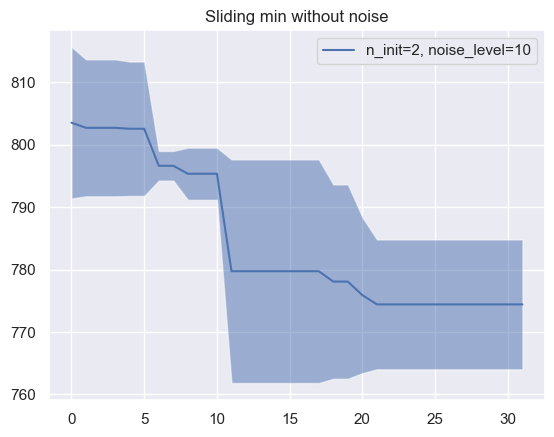

In [40]:

# slide_min line plot
import matplotlib.pyplot as plt

df_no_noise = df[df["noise_bool"] == False]
df_noise = df[df["noise_bool"] == True]



# # df = df.groupby(["n_init", "noise_level", "noise_bool"]).agg({"min": ["mean", "std"]})
df_no_noise = df_no_noise.groupby(["n_init", "noise_level"]).agg({"best": ["mean", "std"]})
df_noise = df_noise.groupby(["n_init", "noise_level"]).agg({"best": ["mean", "std"]})

df_no_noise

fig, ax = plt.subplots()

for idx, row in df_no_noise.iterrows():
    mean = sm_list[(idx[0], idx[1], False)][0]
    std = sm_list[(idx[0], idx[1], False)][1]
    plt.plot(mean, label=f"n_init={idx[0]}, noise_level={idx[1]}")
    plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.5)
    
plt.legend()
plt.title("Sliding min without noise")
plt.show()
